In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from breakout import Breakout

pygame 2.1.0 (SDL 2.0.16, Python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
breakout_env = Breakout()

In [3]:
print("action space: ", breakout_env.action_space)
print("observation space: ", breakout_env.observation_space)

action space:  3
observation space:  6


In [3]:
# running this will run the playable game
breakout_env.main()

brick hit
missed paddle
brick hit
missed paddle


KeyboardInterrupt: 

In [8]:
# run this initially to make the brick layout
breakout_env.make()

In [9]:
breakout_env.step(1)

(array([360, 284, 474,   4,  -4, 520]), -0.2, False)

In [10]:
np.array([330, 296, 486, 4, -4, 520])

array([330, 296, 486,   4,  -4, 520])

In [11]:
class Agent():
    def __init__(self, observation_dim, params = None, action_bounds = None):
        pass

    def __call__(self, obs):
        return self.act(obs)

In [12]:
# REINFORCE

In [13]:
N_EPISODES = 50 # Change this if you find this is not sufficient

In [14]:
l = np.random.random(10)
print(l)
np.argmin(l)

[0.7579943  0.17798667 0.26145675 0.79001586 0.21890877 0.38903392
 0.83987672 0.49122862 0.44002936 0.24368792]


1

In [15]:
def roundToNearest(numbers, toRound):
    distance = np.zeros(len(numbers))
    for i in range(len(numbers)):
        distance[i] = abs(numbers[i] - toRound)
    
    return np.argmin(distance)
        

In [16]:
roundToNearest([1,20, 50, 100], 11)

1

brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in add



brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
brick hit
Average return: -9.999999999999995
Standard deviation: 1.776356839400

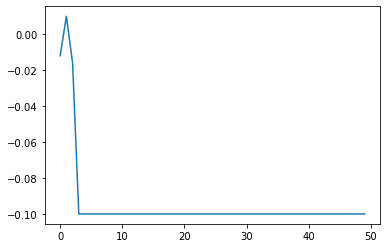

In [13]:
class GaussianPolicy(Agent):
    
    def __init__(self, observation_dim, params = None, action_bounds = None,
                 gamma=0.9, alpha = 0.1, sigma = 0.1):   
        self.states = observation_dim # dimension of observations

        # Action bounds are limits of shape (2,),
        # representing the lower/upper limits on the action
        self.action_bounds = action_bounds 
        
        self.gamma = gamma
        
        # Initial parameters of the policy
        self.params = params
        self.sigma = sigma
        
        self.alpha = alpha
        
    def act(self, obs):
        '''
        obs: Array of size (n, observation_dims) representing a batch of observations,
        which are each a vector of (observation_dims)

        Returns:
        actions: Array of size (n, 1) representing actions determined by params, self.sigma
        '''
#         print(obs)
        theta = self.params
        states = obs
        
        a = np.random.normal(loc=states.dot(theta))
        
        ret = (1/np.sqrt(2*np.pi*self.sigma))*np.exp((-1/(2*self.sigma)) * (a - states.dot(theta)))
        possible_actions = [0,1,2]
        clipped_action = roundToNearest(possible_actions, ret)
        
        return clipped_action # TODO: Write code here

    def update(self, obs, actions, rewards):
        '''
        obs: Array of size (n+1, observation_dims) representing a batch of observations,
        which are each a vector of (observation_dims)
        rewards: Array of size (n,) representing a batch of rewards
        actions: Array of size (n,) representing a batch of actions

        Returns:
        Nothing, modifies parameters according to the REINFORCE algorithm
        '''
        
        cost = 0
        for i in range(len(obs)):
            if i != len(obs) - 1:
                states = obs[i]
                action = actions[i]
                reward = rewards[i]
                
                gaussian_grad = ((action - states.dot(self.params))*states)/self.sigma
                
                score = gaussian_grad*reward
                
                cost+=score
        
        self.params = self.params + self.alpha*cost
        
        return # TODO: Write code here
    
    def collect_data(self, task):
        # Do not modify
        obs = task.reset()

        rewards = np.zeros((100,))
        states = np.zeros((101, self.states))
        actions = np.zeros((100, 1))
        
        for step in range(100):
            states[step, :] = obs
            act = self.__call__(obs)
#             print(act)
            obs, rew, done = task.step(act)
            rewards[step] = rew
            actions[step] = act
#             print(rew)
            
        states[-1, :] = obs
#         print(states, "--")
#         print(rewards)
        
        return states, actions, rewards

# Do not modify
init_mu = np.random.random((breakout_env.observation_space,))

agent = GaussianPolicy(breakout_env.observation_space, init_mu, [breakout_env.min_action, breakout_env.max_action])

rewards = []

for i in range(N_EPISODES):
    data = agent.collect_data(breakout_env)

    rewards.append(np.mean(data[2]))
    agent.update(*data)

plt.plot(np.arange(N_EPISODES), rewards)
# Final Benchmarking
rewards = np.zeros((100, 100))

for i in range(100):
    rewards[i] = agent.collect_data(breakout_env)[2]
        
print("Average return: {}".format(rewards.sum(1).mean()))
print("Standard deviation: {}".format(rewards.sum(1).std()))

In [14]:
# using https://towardsdatascience.com/reinforce-policy-gradient-with-tensorflow2-x-be1dea695f24 instead

In [17]:
class model(tf.keras.Model):
    def __init__(self, observation_space, action_space):
        super().__init__()
        self.d1 = tf.keras.layers.Dense(20,input_dim=observation_space,activation='relu')
        self.d2 = tf.keras.layers.Dense(20,activation='relu')
        self.out = tf.keras.layers.Dense(action_space,activation='softmax')

    def call(self, input_data):
        x = tf.convert_to_tensor(input_data)
        x = self.d1(x)
        x = self.d2(x)
        x = self.out(x)
        return x

    def action_value(self, state):
        p = self.predict(state)
        return p

In [18]:
class AgentReinforce():
    def __init__(self, observation_space, action_space):
        self.model = model(observation_space, action_space)
        self.opt = tf.keras.optimizers.Adam(learning_rate=0.001)
        self.gamma = 1

    def act(self,state):
        prob = self.model(np.array([state]))
        dist = tfp.distributions.Categorical(probs=prob, dtype=tf.float32)
        action = dist.sample()
        return int(action.numpy()[0])

    def a_loss(self,prob, action, reward): 
#         print(prob)
        action_list = [0,1,2]
        clipped_action = roundToNearest(action_list, action)
#         print("action and clipped action: ", action, clipped_action)
#         print(reward)
#         print("-------")
        dist = tfp.distributions.Categorical(probs=prob, dtype=tf.float32)
        log_prob = dist.log_prob(clipped_action)
        loss = -log_prob*reward
        return loss 

    def train(self, states, rewards, actions):
        sum_reward = 0
        discnt_rewards = []
        rewards.reverse()
        for r in rewards:
            sum_reward = r + self.gamma*sum_reward
            discnt_rewards.append(sum_reward)
        discnt_rewards.reverse()  

        for state, reward, action in zip(states, discnt_rewards, actions):
            with tf.GradientTape() as tape:
                p = self.model(np.array([state]), training=True)
                loss = self.a_loss(p, action, reward)
            grads = tape.gradient(loss, self.model.trainable_variables)
            self.opt.apply_gradients(zip(grads, self.model.trainable_variables))

In [19]:
breakout_env.reset()
reinforce_agent = AgentReinforce(breakout_env.observation_space, breakout_env.action_space)
steps = 500
for s in range(steps):

    done = False
    state = breakout_env.reset()
    total_reward = 0
    rewards = []
    states = []
    actions = []
    for i in range(500):
        #env.render()
        action = reinforce_agent.act(state)
        #print(action)
        next_state, reward, done = breakout_env.step(action)
        rewards.append(reward)
        states.append(state)
        actions.append(action)
        state = next_state
        total_reward += reward

        if done:
            reinforce_agent.train(states, rewards, actions)
            #print("total step for this episord are {}".format(t))
            print("total reward after {} steps is {}".format(s, total_reward))

total reward after 0 steps is -9
total reward after 0 steps is -18
total reward after 0 steps is -27
total reward after 1 steps is -9
total reward after 1 steps is -18
total reward after 1 steps is -27
total reward after 2 steps is -9
total reward after 2 steps is -18
total reward after 2 steps is -27
total reward after 3 steps is -9
total reward after 3 steps is -18
total reward after 3 steps is -27
total reward after 4 steps is -9
total reward after 4 steps is -18
total reward after 4 steps is -27
total reward after 5 steps is -9
total reward after 5 steps is -18
total reward after 5 steps is -27
total reward after 6 steps is -9
total reward after 6 steps is -18
total reward after 6 steps is -27
total reward after 7 steps is -9
total reward after 7 steps is -18
total reward after 7 steps is -27
total reward after 8 steps is -9
total reward after 8 steps is -18
total reward after 8 steps is -27
total reward after 9 steps is -9
total reward after 9 steps is -18
total reward after 9 ste

total reward after 79 steps is -18
total reward after 79 steps is -27
total reward after 80 steps is -9
total reward after 80 steps is -18
total reward after 80 steps is -27
total reward after 81 steps is -9
total reward after 81 steps is -18
total reward after 81 steps is -27
total reward after 82 steps is -9
total reward after 82 steps is -18
total reward after 82 steps is -27
total reward after 83 steps is -9
total reward after 83 steps is -18
total reward after 83 steps is -27
total reward after 84 steps is -9
total reward after 84 steps is -18
total reward after 84 steps is -27
total reward after 85 steps is -9
total reward after 85 steps is -18
total reward after 85 steps is -27
total reward after 86 steps is -9
total reward after 86 steps is -18
total reward after 86 steps is -27
total reward after 87 steps is -9
total reward after 87 steps is -18
total reward after 87 steps is -27
total reward after 88 steps is -9
total reward after 88 steps is -18
total reward after 88 steps i

total reward after 156 steps is -27
total reward after 157 steps is -9
total reward after 157 steps is -18
total reward after 157 steps is -27
total reward after 158 steps is -9
total reward after 158 steps is -18
total reward after 158 steps is -27
total reward after 159 steps is -9
total reward after 159 steps is -18
total reward after 159 steps is -27
total reward after 160 steps is -9
total reward after 160 steps is -18
total reward after 160 steps is -27
total reward after 161 steps is -9
total reward after 161 steps is -18
total reward after 161 steps is -27
total reward after 162 steps is -9
total reward after 162 steps is -18
total reward after 162 steps is -27
total reward after 163 steps is -9
total reward after 163 steps is -18
total reward after 163 steps is -27
total reward after 164 steps is -9
total reward after 164 steps is -18
total reward after 164 steps is -27
total reward after 165 steps is -9
total reward after 165 steps is -18
total reward after 165 steps is -27
t

total reward after 233 steps is -18
total reward after 233 steps is -27
total reward after 234 steps is -9
total reward after 234 steps is -18
total reward after 234 steps is -27
total reward after 235 steps is -9
total reward after 235 steps is -18
total reward after 235 steps is -27
total reward after 236 steps is -9
total reward after 236 steps is -18
total reward after 236 steps is -27
total reward after 237 steps is -9
total reward after 237 steps is -18
total reward after 237 steps is -27
total reward after 238 steps is -9
total reward after 238 steps is -18
total reward after 238 steps is -27
total reward after 239 steps is -9
total reward after 239 steps is -18
total reward after 239 steps is -27
total reward after 240 steps is -9
total reward after 240 steps is -18
total reward after 240 steps is -27
total reward after 241 steps is -9
total reward after 241 steps is -18
total reward after 241 steps is -27
total reward after 242 steps is -9
total reward after 242 steps is -18
t

total reward after 310 steps is -9
total reward after 310 steps is -18
total reward after 310 steps is -27
total reward after 311 steps is -9
total reward after 311 steps is -18
total reward after 311 steps is -27
total reward after 312 steps is -9
total reward after 312 steps is -18
total reward after 312 steps is -27
total reward after 313 steps is -9
total reward after 313 steps is -18
total reward after 313 steps is -27
total reward after 314 steps is -9
total reward after 314 steps is -18
total reward after 314 steps is -27
total reward after 315 steps is -9
total reward after 315 steps is -18
total reward after 315 steps is -27
total reward after 316 steps is -9
total reward after 316 steps is -18
total reward after 316 steps is -27
total reward after 317 steps is -9
total reward after 317 steps is -18
total reward after 317 steps is -27
total reward after 318 steps is -9
total reward after 318 steps is -18
total reward after 318 steps is -27
total reward after 319 steps is -9
to

total reward after 386 steps is -27
total reward after 387 steps is -9
total reward after 387 steps is -18
total reward after 387 steps is -27
total reward after 388 steps is -9
total reward after 388 steps is -18
total reward after 388 steps is -27
total reward after 389 steps is -9
total reward after 389 steps is -18
total reward after 389 steps is -27
total reward after 390 steps is -9
total reward after 390 steps is -18
total reward after 390 steps is -27
total reward after 391 steps is -9
total reward after 391 steps is -18
total reward after 391 steps is -27
total reward after 392 steps is -9
total reward after 392 steps is -18
total reward after 392 steps is -27
total reward after 393 steps is -9
total reward after 393 steps is -18
total reward after 393 steps is -27
total reward after 394 steps is -9
total reward after 394 steps is -18
total reward after 394 steps is -27
total reward after 395 steps is -9
total reward after 395 steps is -18
total reward after 395 steps is -27
t

total reward after 463 steps is -18
total reward after 463 steps is -27
total reward after 464 steps is -9
total reward after 464 steps is -18
total reward after 464 steps is -27
total reward after 465 steps is -9
total reward after 465 steps is -18
total reward after 465 steps is -27
total reward after 466 steps is -9
total reward after 466 steps is -18
total reward after 466 steps is -27
total reward after 467 steps is -9
total reward after 467 steps is -18
total reward after 467 steps is -27
total reward after 468 steps is -9
total reward after 468 steps is -18
total reward after 468 steps is -27
total reward after 469 steps is -9
total reward after 469 steps is -18
total reward after 469 steps is -27
total reward after 470 steps is -9
total reward after 470 steps is -18
total reward after 470 steps is -27
total reward after 471 steps is -9
total reward after 471 steps is -18
total reward after 471 steps is -27
total reward after 472 steps is -9
total reward after 472 steps is -18
t

In [ ]:
print("action space: ", breakout_env.action_space)
print("observation space: ", breakout_env.observation_space)